In [1]:
from netAttempt import SliceNet
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

W0413 15:52:35.210406 139697067984640 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


1.13.1


Using TensorFlow backend.


importing hub
Instructions for updating:
Colocations handled automatically by placer.


W0413 15:52:36.564797 139697067984640 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
net = SliceNet()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0413 15:52:44.541742 139697067984640 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0413 15:52:45.933511 139697067984640 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
filenames = ['/home/bmmidei/SliceCast/data/hdf5/batch0_0.hdf5',
            '/home/bmmidei/SliceCast/data/hdf5/batch0_1.hdf5',
            '/home/bmmidei/SliceCast/data/hdf5/batch0_2.hdf5']

history = net.train(filenames, batch_size=16, epochs=3, steps_per_epoch=20, maxlen=None, save=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoderIn (InputLayer)       (None, None)              0         
_________________________________________________________________
encoderOut (Lambda)          (None, None, 512)         0         
_________________________________________________________________
lstm_1 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
lstm_2 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
time_distributed (TimeDistri (None, None, 128)         65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
__________

W0413 15:52:55.272774 139697067984640 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/3
20/20 [==============================] - 49s 2s/step - loss: 0.1800 - acc: 0.9539
Epoch 2/3
20/20 [==============================] - 61s 3s/step - loss: 0.0900 - acc: 0.9794
Epoch 3/3
20/20 [==============================] - 103s 5s/step - loss: 0.0689 - acc: 0.9870
Saved model to disk


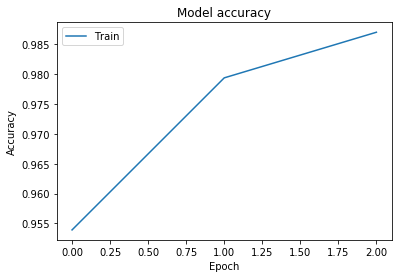

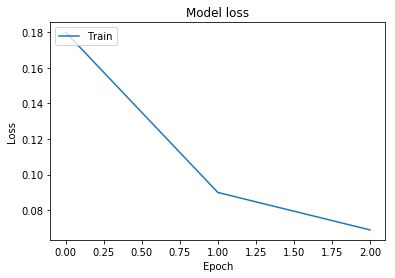

In [4]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()